(Step 0) WEAT Score 구해보기 [예제]

In [1]:
import konlpy
import gensim
import sklearn
import seaborn
print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
4.3.3
1.5.2
0.13.2


In [2]:
import numpy as np
from numpy import dot
from numpy.linalg import norm


def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B  # , c_a, c_b

def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return (mean_X-mean_Y)/std_dev

In [3]:
model_dir = './GoogleNews-vectors-negative300.bin'

from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True)

w2v

In [4]:
print(len(w2v.index_to_key))
print(len(w2v['I']))
print(w2v.vectors.shape)

3000000
300
(3000000, 300)


In [ ]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [6]:
import numpy as np
target_X = ['science', 'technology', 'physics', 'chemistry',
            'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance',
            'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle',
               'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt',
               'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.2624875

STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [7]:
import os

with open('./synopsis/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [8]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('./synopsis/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line:
            break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

In [9]:
print(len(tokenized))

71156


STEP 2. 추출된 결과로 embedding model 만들기

In [10]:
from gensim.models import Word2Vec

model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

[('작품', 0.8808546662330627),
 ('다큐멘터리', 0.8484206199645996),
 ('드라마', 0.8219798803329468),
 ('영화로', 0.7831276655197144),
 ('형식', 0.7812227010726929),
 ('소재', 0.7684532999992371),
 ('코미디', 0.7623653411865234),
 ('스토리', 0.7616527080535889),
 ('디지털화', 0.755470335483551),
 ('감동', 0.7469028234481812)]

In [11]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.7082605361938477),
 ('만남', 0.706405520439148),
 ('첫사랑', 0.7054343819618225),
 ('애정', 0.7028264403343201),
 ('이별', 0.6879203915596008),
 ('진심', 0.6841642260551453),
 ('만인', 0.6837300062179565),
 ('감정', 0.6769194006919861),
 ('시빌라', 0.6748835444450378),
 ('가슴', 0.6746953725814819)]

In [12]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.8993717432022095),
 ('오페라', 0.880226731300354),
 ('각색', 0.8771084547042847),
 ('시나리오', 0.8758631348609924),
 ('배우', 0.8719501495361328),
 ('스타일', 0.8717488050460815),
 ('대본', 0.8693583011627197),
 ('연기자', 0.8680383563041687),
 ('영화로', 0.8676782846450806),
 ('연기', 0.8669466972351074)]

STEP 3. target, attribute 단어 셋 만들기

In [13]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'


def read_token(file_name):
    okt = Okt()
    result = []
    with open('./synopsis/'+file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line:
                break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:  # , "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

In [14]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [16]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])

23976
영화


In [17]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

# art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w1.sort(key=lambda x: x[1], reverse=True)
# gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 영화제, 사이, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 아빠, 생활, 통해, 모습, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 결혼, 사고, 전쟁, 위기, 때문, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 운명, 결심, 관계, 현실, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 처음, 국제, 누구, 살인, 충격, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 의도, 동생, 하루, 위기, 계획, 정체, 한국, 

In [18]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv):
        target_art.append(w1_[i])
    if len(target_art) == n:
        break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv):
        target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [19]:
print(target_art)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린']


In [20]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [21]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
              '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [22]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [24]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 프롤, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 사람, 운명, 최고, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 태구, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시

## TF-IDF의 문제점
1. 중복단어들이 많이 보임
2. 예 : 아빠, 아버지 등...

### 제안 방법
Word Embedding 기반 유사도 계산
단어 임베딩 모델(Word2Vec)을 사용하여 단어 간 유사도를 측정한 뒤, TF-IDF 점수가 높은 단어들 중 유사도가 높은 단어를 제거

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Word Embedding 기반 유사도 제거 함수
def remove_similar_words(word_list, model, threshold=0.8):
    vectors = [model.wv[word] for word in word_list if word in model.wv]
    similarity_matrix = cosine_similarity(vectors)
    np.fill_diagonal(similarity_matrix, 0)
    to_remove = set()

    for i in range(len(word_list)):
        if i in to_remove:
            continue
        for j in range(i + 1, len(word_list)):
            if similarity_matrix[i, j] > threshold:
                to_remove.add(j)

    filtered_words = [word_list[i]
                      for i in range(len(word_list)) if i not in to_remove]
    return filtered_words


# 기존 코드에 Word Embedding 유사도 제거 과정 추가
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

attributes = []
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)  # TF-IDF 점수 기준 정렬
    print(genre_name[i], end=': ')

    attr = []
    j = 0
    while len(attr) < 30:  # 우선 상위 30개 단어를 선택
        word = vectorizer.get_feature_names_out()[w[i][j][0]]
        if word in model.wv:
            attr.append(word)
        j += 1

    # 유사도 제거 적용 (임계값: 0.8)
    filtered_attr = remove_similar_words(attr, model, threshold=0.8)
    filtered_attr = filtered_attr[:15]  # 최종적으로 상위 15개 단어만 선택
    attributes.append(filtered_attr)

    print(', '.join(filtered_attr))

SF: 위해, 자신, 지구, 시작, 사람, 인간, 미래, 그녀, 로봇, 세계, 모든, 박사, 존재, 세상, 발견
가족: 엄마, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 국제, 마을, 할머니, 사람, 아이
공연: 오페라, 사랑, 토스카, 자신, 그녀, 프레, 위해, 왕자, 아리아, 도시, 시작
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 대한, 친구
다큐멘터리: 영화제, 영화, 다큐, 국제, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 통해
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 아버지, 가족
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 관계, 엄마
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 영화, 자신, 니웨, 영화제, 시작, 위해, 최고, 애니, 공연
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 살인, 사람, 남자, 모든, 발견, 한길수, 계획, 아버지
사극: 조선, 위해, 시작, 사랑, 자신, 그녀, 루안, 사람, 운명, 최고, 전쟁, 히파티아, 신재효, 권력
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 그레이프바인, 헨리, 마을, 자신, 아이, 시작, 태구, 분노, 가족, 제임스, 사람
성인물(에로): 그녀, 남편, 마사지, 자신, 관계, 영화, 남자, 위해, 시작, 마음, 사랑, 에피소드, 그린, 다시, 자위
스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 살인, 남자, 발견, 아내, 경찰, 친구, 모든, 사실, 가족
애니메이션: 애니메이션, 국제, 영화

### 기존 단어와 비교
SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선,     
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타,      
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해,     
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비,     
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌,    
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계,    
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지,     
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내,     
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 프롤,     
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 아이,     
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해,     
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 사람, 운명, 최고, 하선, 전쟁,     
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 태구,    
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑,     
스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 살인, 남자, 발견, 아내, 경찰, 친구, 모든, 사실, 살해,    
애니메이션: 애니메이션, 국제, 영화제, 친구, 인디애니페스트, 위해, 자신, 시작, 사람, 페스티벌, 서울, 이야기, 아이, 마을, 소녀,    
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 모든, 목숨, 사실, 친구, 가족, 요원,     
어드벤처: 위해, 자신, 시작, 친구, 마을, 아버지, 영화, 사람, 아이, 여행, 세계, 앤트, 세상, 가족, 모험,     
전쟁: 전쟁, 독일군, 전투, 위해, 작전, 시작, 부대, 윈터스, 독일, 연합군, 미군, 임무, 자신, 사람, 나치,       
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건,     
판타지: 자신, 그녀, 시작, 위해, 사람, 사랑, 요괴, 영화제, 이야기, 영화, 소녀, 남자, 인간, 세상, 세계,      

중복단어가 잘 제거된 듯 보임

STEP 4. WEAT score 계산과 시각화



In [26]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [27]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [28]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j], matrix[i][j])

SF 가족 -0.362975
SF 공연 -0.72490114
SF 공포(호러) -0.7124211
SF 기타 0.23615415
SF 다큐멘터리 0.623317
SF 드라마 -0.28406486
SF 멜로로맨스 -0.79929537
SF 뮤지컬 0.27205068
SF 미스터리 -0.7191095
SF 범죄 -0.3427045
SF 사극 -0.66849965
SF 서부극(웨스턴) -0.55074424
SF 성인물(에로) -0.52605385
SF 스릴러 -0.5409138
SF 애니메이션 0.39764413
SF 액션 -0.41159707
SF 어드벤처 -0.7558444
SF 전쟁 -0.016692577
SF 코미디 -0.28001186
SF 판타지 0.032906998
가족 공연 -0.5069146
가족 공포(호러) -0.30660227
가족 기타 0.6188273
가족 다큐멘터리 0.83853614
가족 드라마 0.1731302
가족 멜로로맨스 -0.7233139
가족 뮤지컬 0.5674368
가족 미스터리 -0.4017814
가족 범죄 0.009407434
가족 사극 -0.15512787
가족 서부극(웨스턴) -0.1522392
가족 성인물(에로) -0.34523016
가족 스릴러 -0.24245456
가족 애니메이션 0.84267575
가족 액션 0.06295405
가족 어드벤처 -0.28012654
가족 전쟁 0.32361466
가족 코미디 0.22687165
가족 판타지 0.42944133
공연 공포(호러) 0.0845557
공연 기타 0.95761126
공연 다큐멘터리 0.9987769
공연 드라마 0.7633534
공연 멜로로맨스 -0.5196627
공연 뮤지컬 0.8597486
공연 미스터리 -0.075043835
공연 범죄 0.4024801
공연 사극 0.6505803
공연 서부극(웨스턴) 0.4365858
공연 성인물(에로) 0.0019165712
공연 스릴러 0.101052284
공연 애니메이션 0.98759514
공연 액션 0.4932

<Axes: >

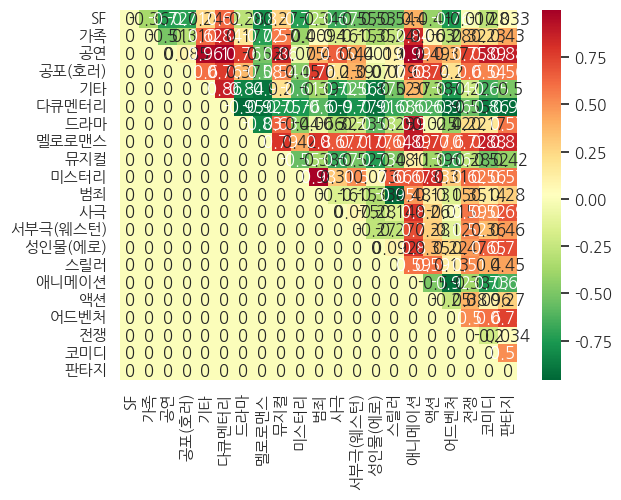

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')
# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name,
                 yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

추가적인 작업    
-> 단어 리스트를 보면 쓸데없는 '위해' 라는 단어들이 많이 보임.   
TF-IDF를 통해서 안 지워진 단어로 보임    
이런 단어들을 지워줄 필요가 있어보임   